**IMPORTING LIBRARIES**

In [148]:
#Importing neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**READ DATSET**

In [149]:
#Load the train dataset
train_data=pd.read_csv('/content/train_LZdllcl.csv')
test_data=pd.read_csv('/content/test_2umaH9m.csv')

In [150]:
#display first few rows  of train data
train_data.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [151]:
#display first few rows  of test data
test_data.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


**DATA EXPLORATION**

In [152]:
#getting shape of the train and test data
print(train_data.shape)
print(test_data.shape)

(54808, 14)
(23490, 13)


In [153]:
#display columns in the train data
train_data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [154]:
#display columns in the test data
test_data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [155]:
#display general information about the train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [156]:
#display general information about the test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [157]:
#statistical information about the train data
train_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [158]:
#statistical information about the test data
test_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [159]:
#drop employee id column train data
train_data=train_data.drop('employee_id',axis=1)


In [160]:
#drop employee id column test data
test_data=test_data.drop('employee_id',axis=1)

In [161]:
#counting values in deparment
print(train_data['department'].value_counts())

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64


In [162]:
##counting values in education
print(train_data['education'].value_counts())

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64


In [163]:
#counting values in region
print(train_data['region'].value_counts())

region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: count, dtype: int64


In [164]:
#counting values in gender
print(train_data['gender'].value_counts())

gender
m    38496
f    16312
Name: count, dtype: int64


In [165]:
#counting values in deparment
print(train_data['recruitment_channel'].value_counts())

recruitment_channel
other       30446
sourcing    23220
referred     1142
Name: count, dtype: int64


In [166]:
print(train_data['is_promoted'].value_counts())

is_promoted
0    50140
1     4668
Name: count, dtype: int64


**DATA VISUALIZATION**

univariate analysis

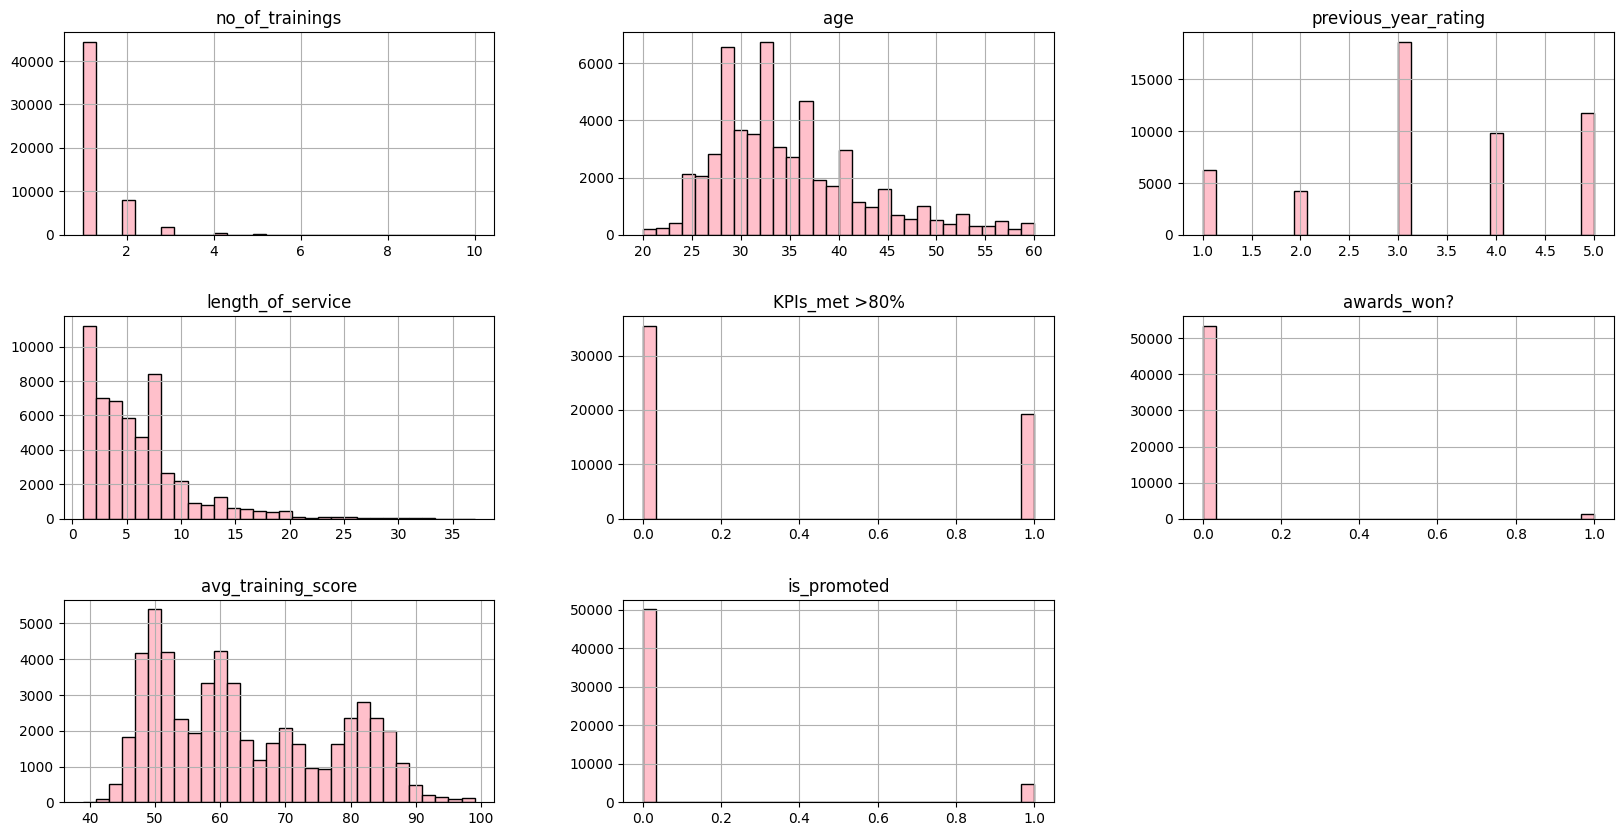

In [167]:
#ploting histograms of numerical column
train_data.hist(figsize=(20, 10), bins=30, color='pink', edgecolor='black')
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()


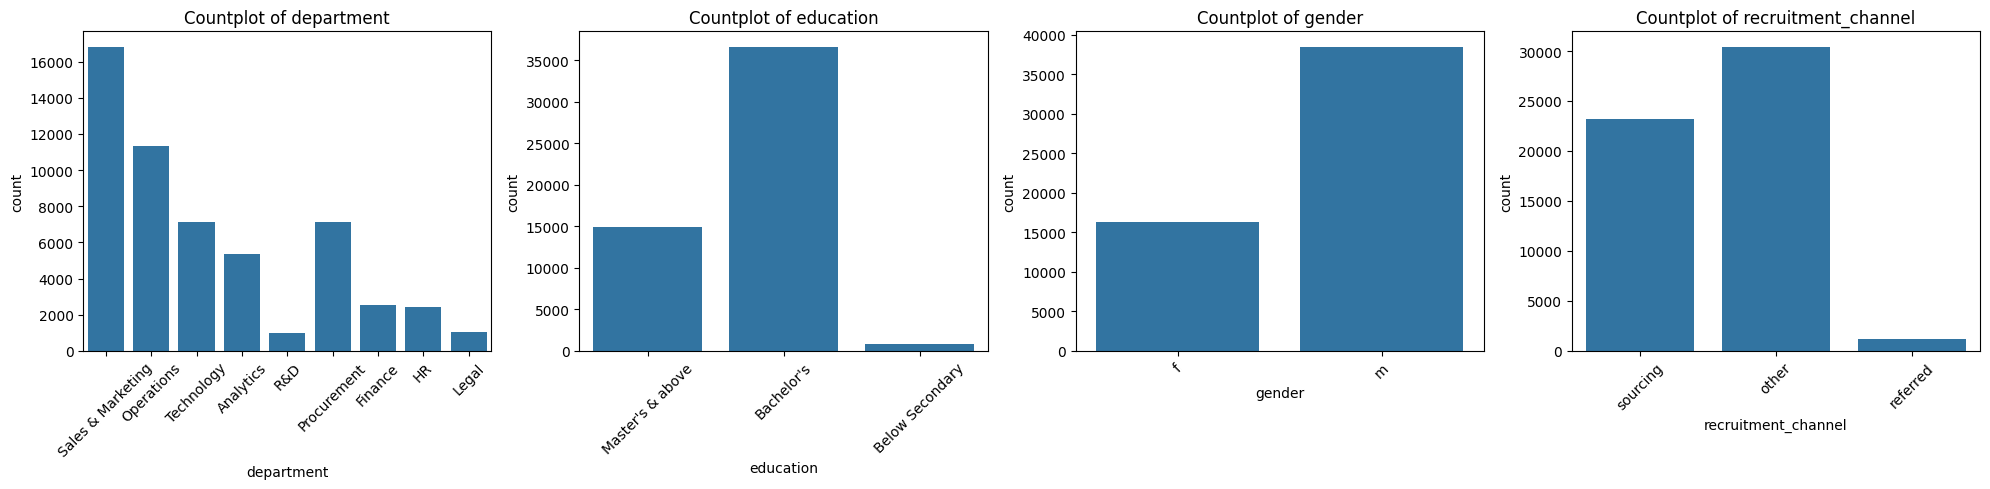

In [168]:
#count plot of categorical columns except region
cat_col = ['department','education', 'gender', 'recruitment_channel']
plt.figure(figsize=(20, 5))
for i, col in enumerate(cat_col, 1):
    plt.subplot(1, len(cat_col), i)
    sns.countplot(x=col, data=train_data)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-169-157b6b1ab9da>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['avg_training_score'], color = 'blue')


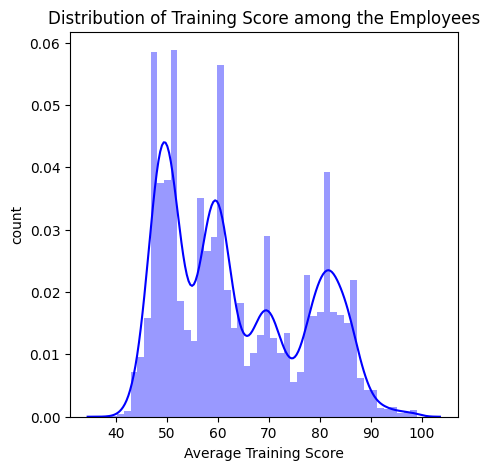

In [169]:
# checking the distribution of the avg_training score of the Employees

plt.figure(figsize=(5,5))
sns.distplot(train_data['avg_training_score'], color = 'blue')
plt.title('Distribution of Training Score among the Employees')
plt.xlabel('Average Training Score')
plt.ylabel('count')
plt.show()

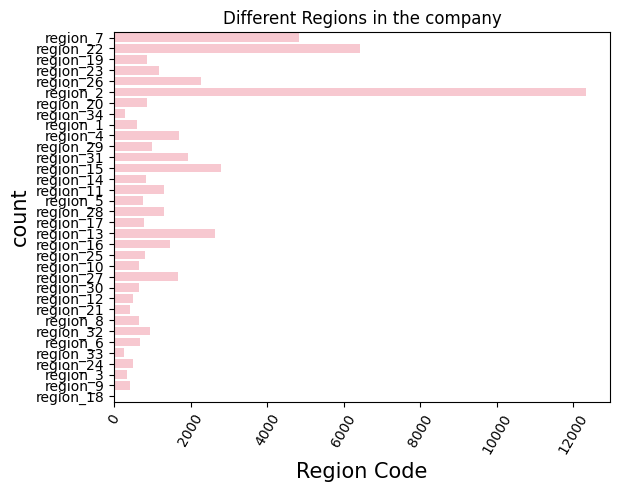

In [170]:
#plotting count plot for region
sns.countplot(train_data['region'], color = 'pink')
plt.title('Different Regions in the company')
plt.xticks(rotation = 60)
plt.xlabel('Region Code', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

Bivariate analysis

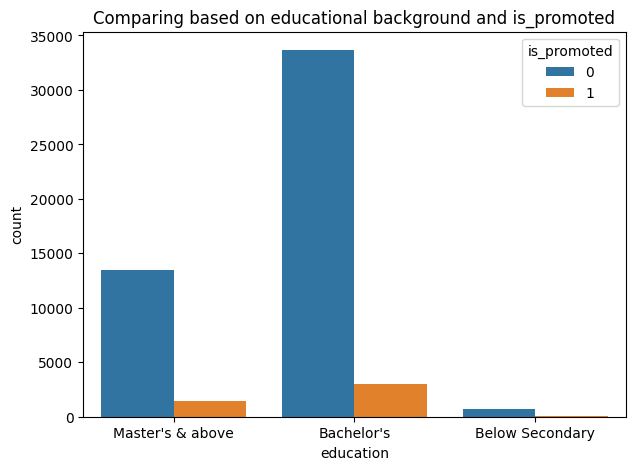

In [171]:
# Employees with which educational background have been promoted the most?
plt.figure(figsize=(7, 5))
sns.countplot(x = 'education', hue = 'is_promoted', data = train_data)
plt.title('Comparing based on educational background and is_promoted')
plt.show()

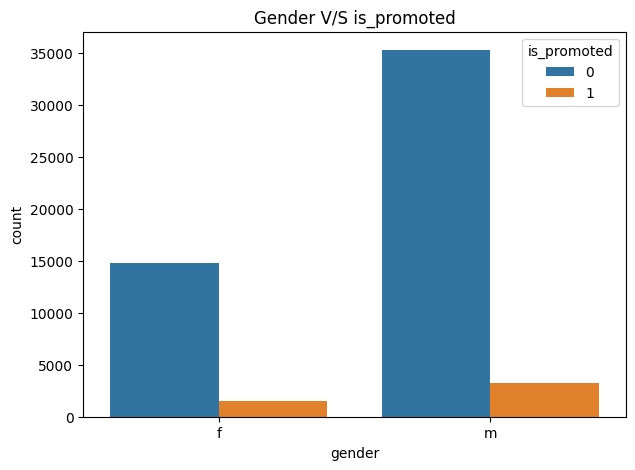

In [172]:
# Gender V/S is_promoted
plt.figure(figsize=(7, 5))
sns.countplot(x = 'gender', hue = 'is_promoted', data = train_data)
plt.title('Gender V/S is_promoted')
plt.show()

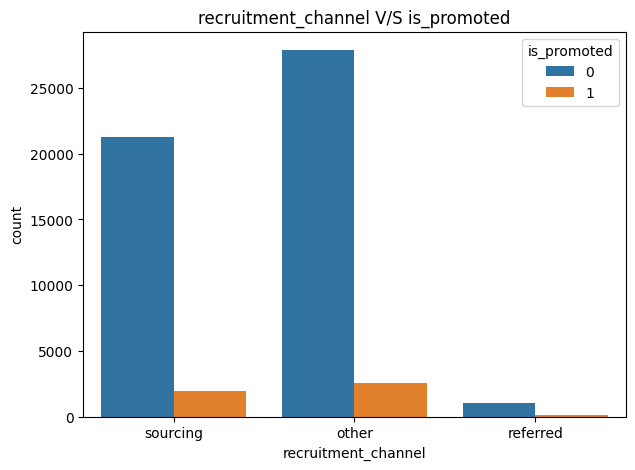

In [173]:
# recruitment_channel V/S is_promoted
plt.figure(figsize=(7, 5))
sns.countplot(x = 'recruitment_channel', hue = 'is_promoted', data = train_data)
plt.title('recruitment_channel V/S is_promoted')
plt.show()

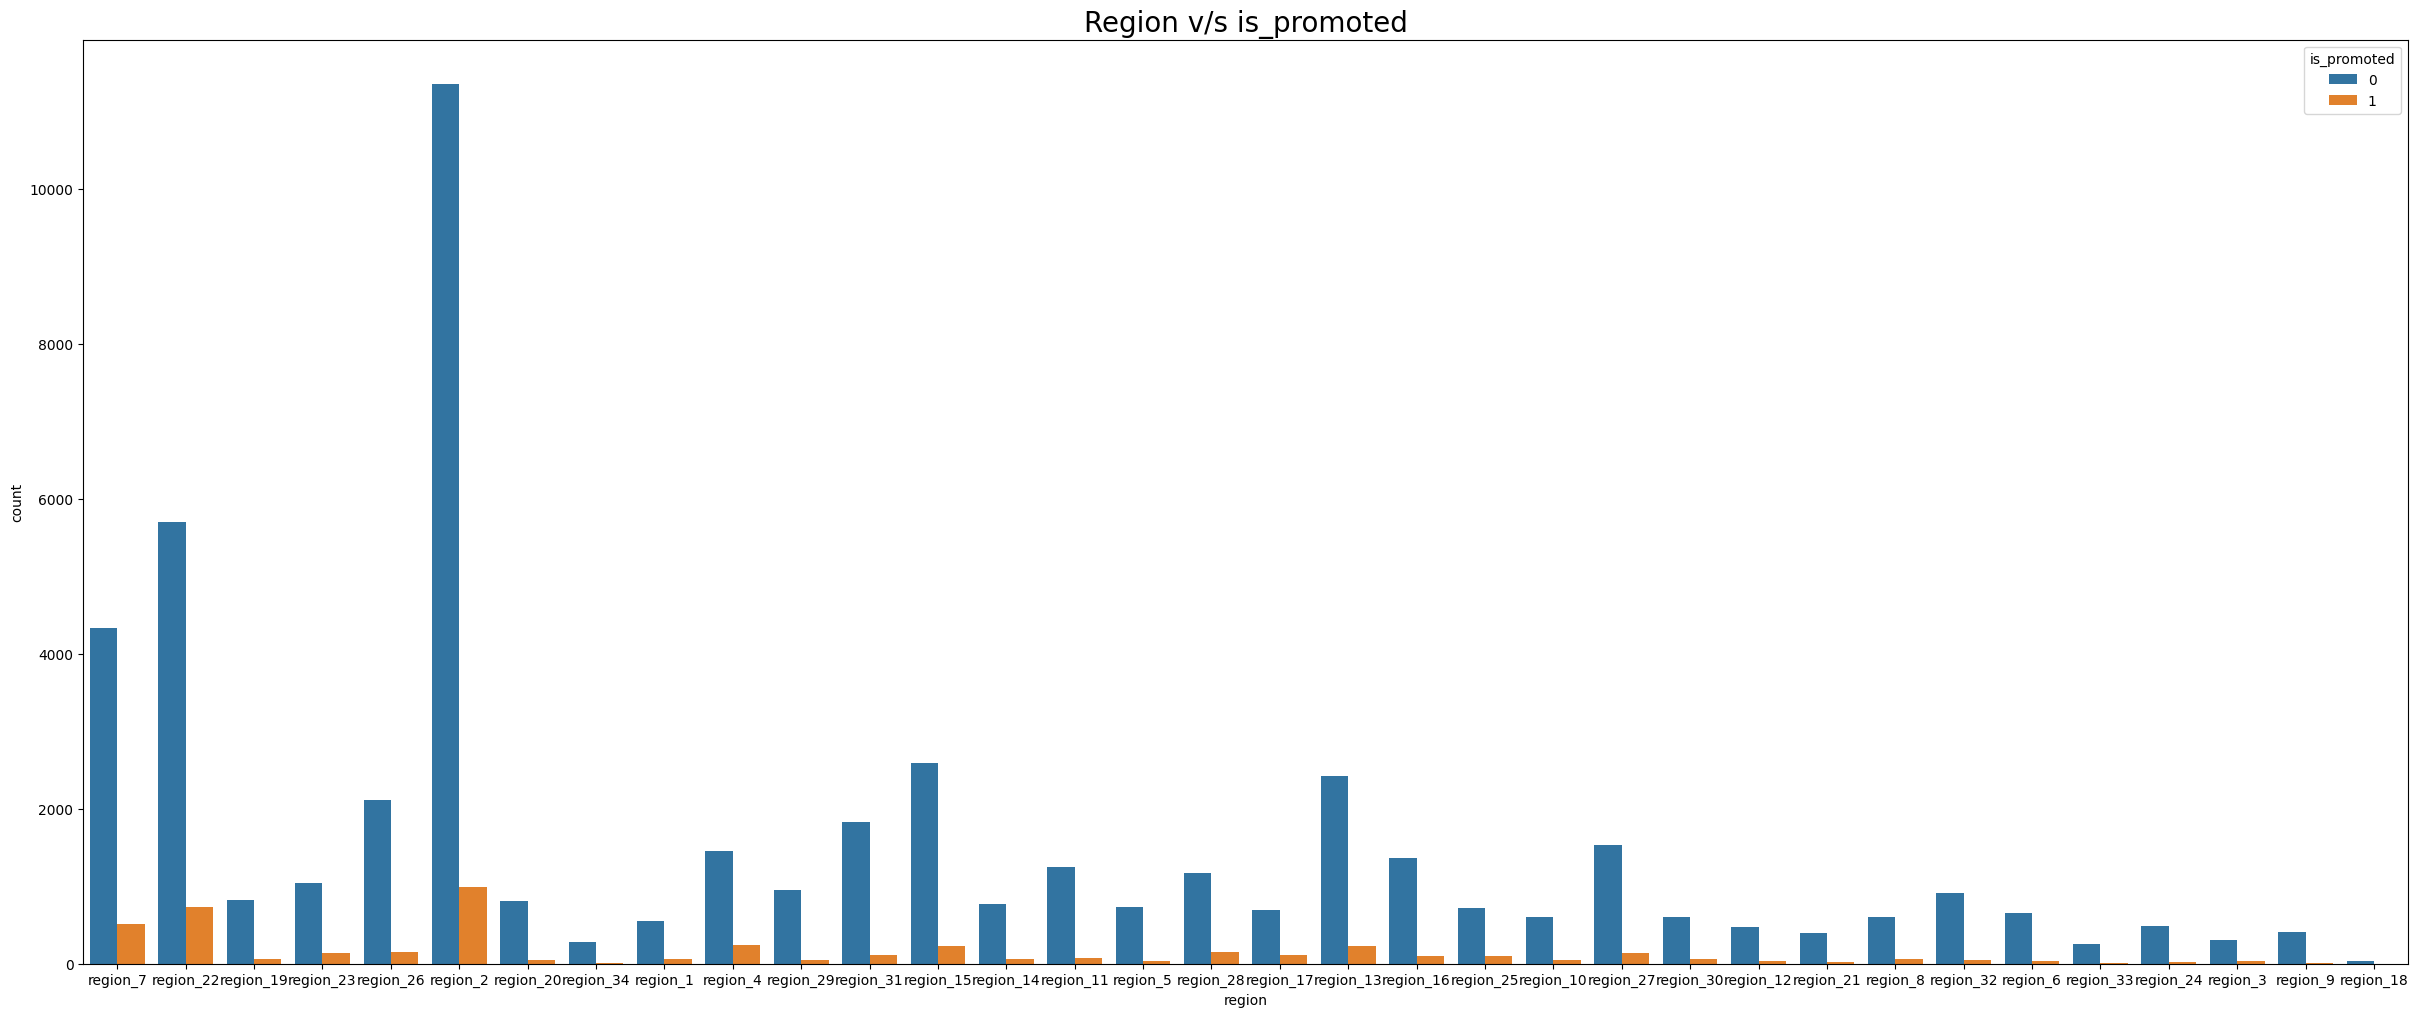

In [174]:
#Region and is_promoted
plt.figure(figsize=(30,12))
sns.countplot(x='region',data=train_data,hue='is_promoted')
plt.title('Region v/s is_promoted',fontsize = 20)
plt.show()

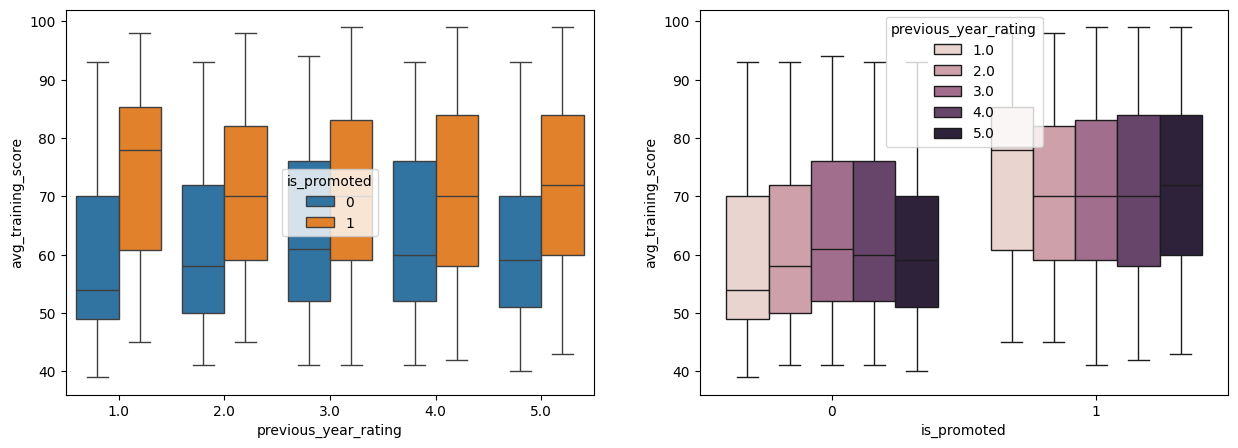

In [175]:
# create subplot plot
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

# boxplot
sns.boxplot(x='previous_year_rating',y='avg_training_score',data=train_data,hue='is_promoted', ax = axes[0])
sns.boxplot(x='is_promoted',y='avg_training_score',data=train_data,hue='previous_year_rating', ax = axes[1])
plt.show()

Multi variate analysis

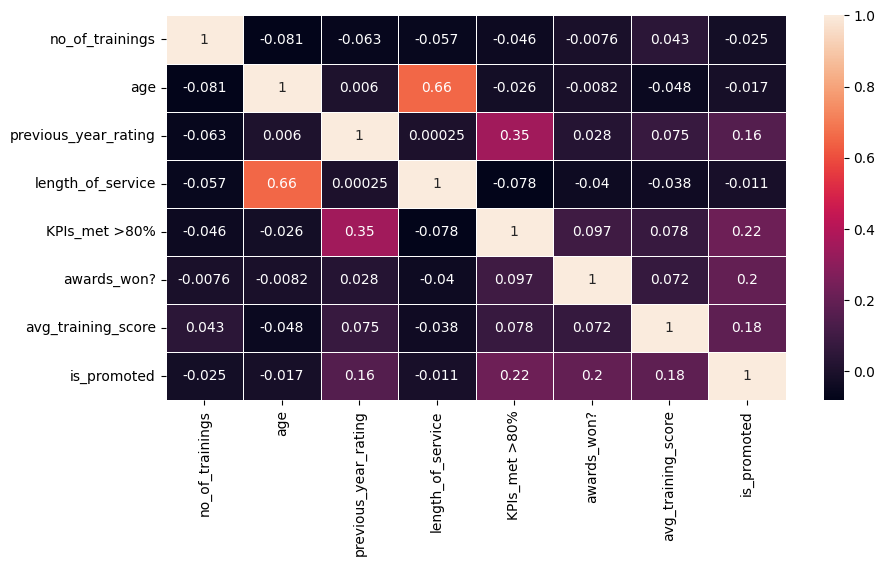

In [176]:
# Correlation matrix between numerical values

plt.figure(figsize=(10, 5))
cor = train_data[cols_plot_hist].corr()
sns.heatmap(cor, annot=True, linewidths=0.5)
plt.show()

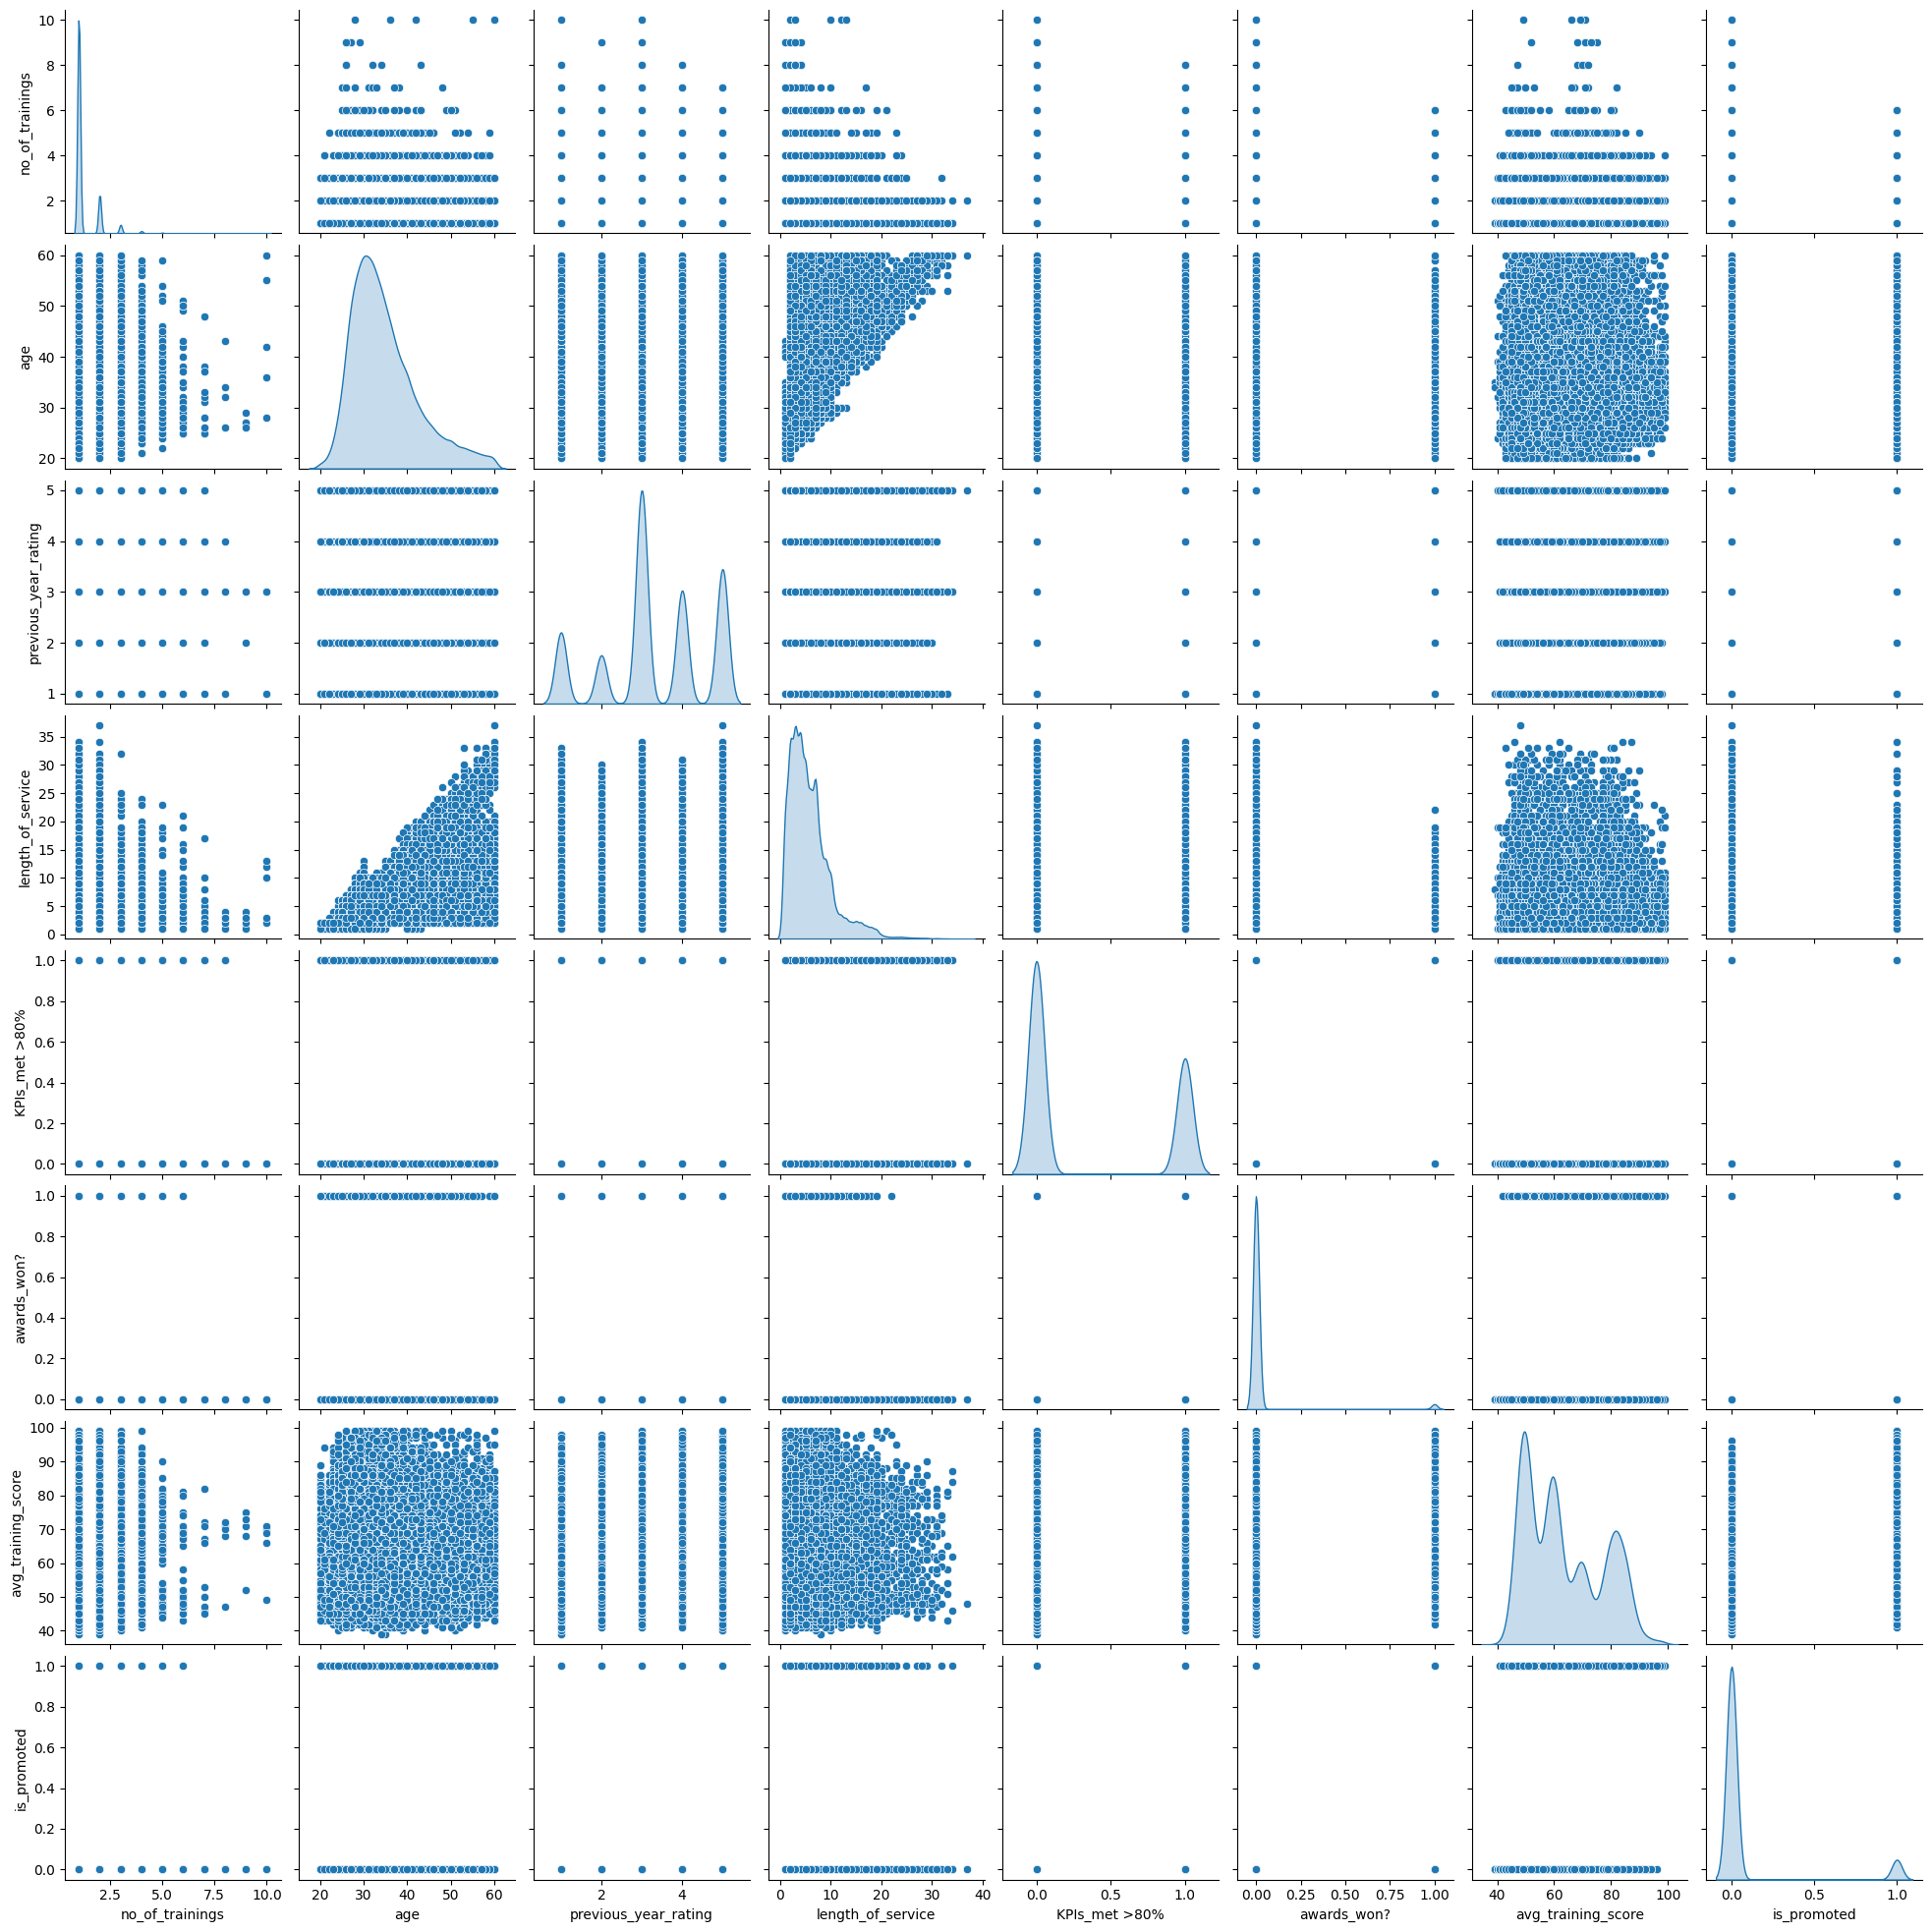

In [177]:
#pairplot
sns.pairplot(train_data,diag_kind='kde')
plt.show()

**DATA PREPROCESSING**

Handling Missig values

In [178]:
#checking null values in train data
train_data.isnull().sum()

,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0
KPIs_met >80%,0


In [179]:
#checking null values in test data
test_data.isnull().sum()

,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0
KPIs_met >80%,0


In [180]:
# Fill missing 'education' values with the mode in train data
train_data['education'].fillna(train_data['education'].mode()[0], inplace=True)

# Calculate median for 'previous_year_rating' and fill missing values in train data
median_val= train_data['previous_year_rating'].median()
train_data['previous_year_rating'].fillna(median_val, inplace=True)


<ipython-input-180-d31cd653ecaa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['education'].fillna(train_data['education'].mode()[0], inplace=True)
<ipython-input-180-d31cd653ecaa>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [181]:
# Fill missing 'education' values with the mode in test data
test_data['education'].fillna(test_data['education'].mode()[0], inplace=True)

# Calculate median for 'previous_year_rating' and fill missing values in test data
median_value= test_data['previous_year_rating'].median()
test_data['previous_year_rating'].fillna(median_value, inplace=True)


<ipython-input-181-72e8ce3544ff>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['education'].fillna(test_data['education'].mode()[0], inplace=True)
<ipython-input-181-72e8ce3544ff>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

In [182]:
train_data.isnull().sum()

,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0
KPIs_met >80%,0


In [183]:
test_data.isnull().sum()

,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0
KPIs_met >80%,0


Handling outliers

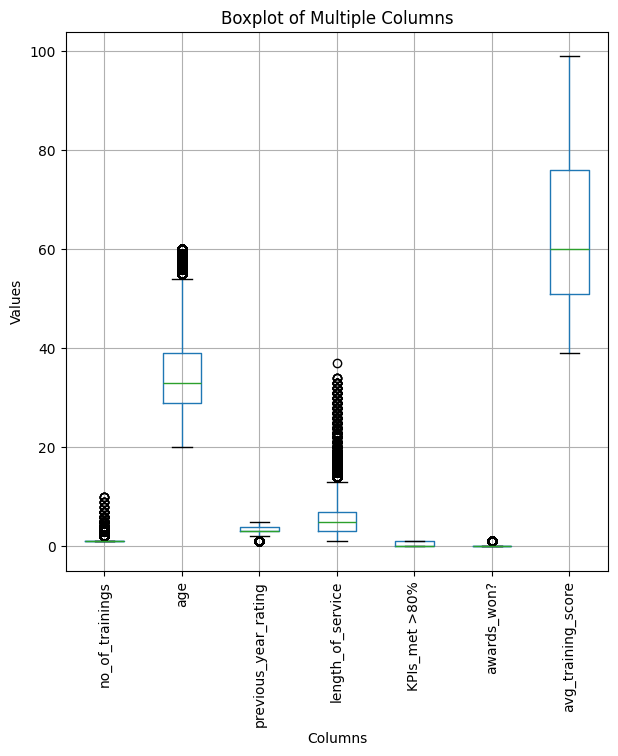

In [184]:
# Create boxplot to check outliers are present in the dataset in train data
# List of columns to include in the boxplot
cols_to_boxplot = [
    'no_of_trainings',
    'age',
    'previous_year_rating',
    'length_of_service',
    'KPIs_met >80%',
    'awards_won?',
    'avg_training_score'

]
#create boxplot
plt.figure(figsize=(7, 7))
train_data[cols_to_boxplot].boxplot()
plt.title('Boxplot of Multiple Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

In [185]:
# Columns to apply the IQR method to
cols_boxplot = [
    'no_of_trainings',
    'age',
    'previous_year_rating',
    'length_of_service',
    'awards_won?'
]

# Applying the IQR method to each specified column
for column in cols_boxplot:
    Q1 = train_data[column].quantile(0.25)
    Q3 = train_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train_data[column] = np.where(train_data[column] < lower_bound, lower_bound, train_data[column])
    train_data[column] = np.where(train_data[column] > upper_bound, upper_bound, train_data[column])

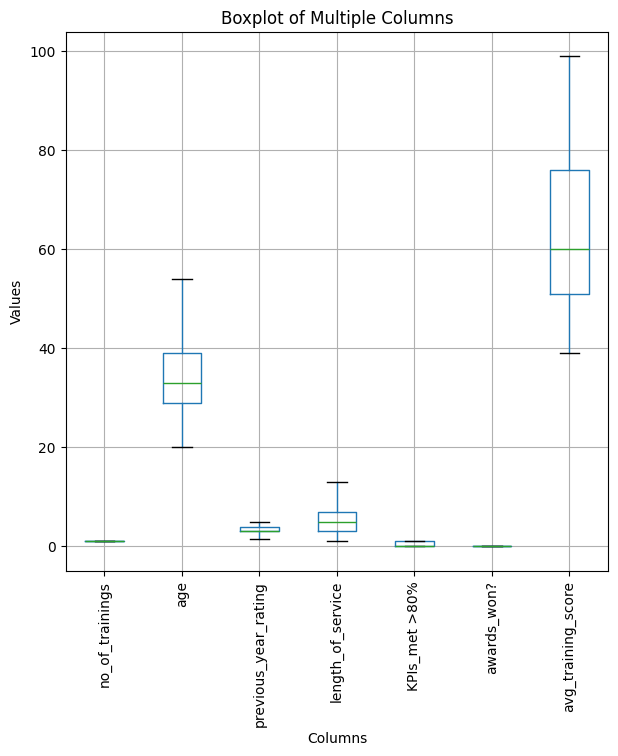

In [186]:
# Create boxplot to check outliers are present in the dataset after oulier treatment
#create boxplot
plt.figure(figsize=(7, 7))
train_data[cols_to_boxplot].boxplot()
plt.title('Boxplot of Multiple Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

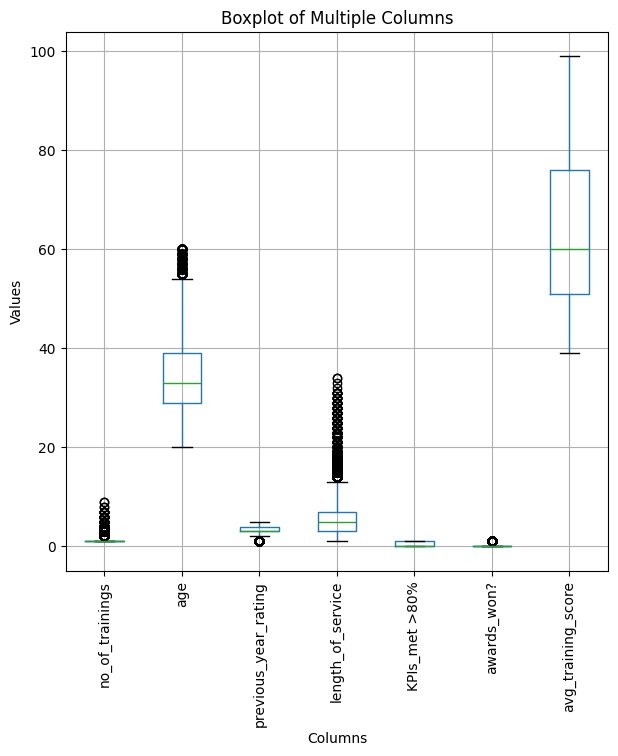

In [187]:
# Create boxplot to check outliers are present in the dataset in test data
#create boxplot
plt.figure(figsize=(7, 7))
test_data[cols_to_boxplot].boxplot()
plt.title('Boxplot of Multiple Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

In [188]:
# Columns to apply the IQR method to
cols_boxplot = [
    'no_of_trainings',
    'age',
    'previous_year_rating',
    'length_of_service',
    'awards_won?',

]

# Applying the IQR method to each specified column
for column in cols_boxplot:
    Q1 = test_data[column].quantile(0.25)
    Q3 = test_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    test_data[column] = np.where(test_data[column] < lower_bound, lower_bound, test_data[column])
    test_data[column] = np.where(test_data[column] > upper_bound, upper_bound, test_data[column])

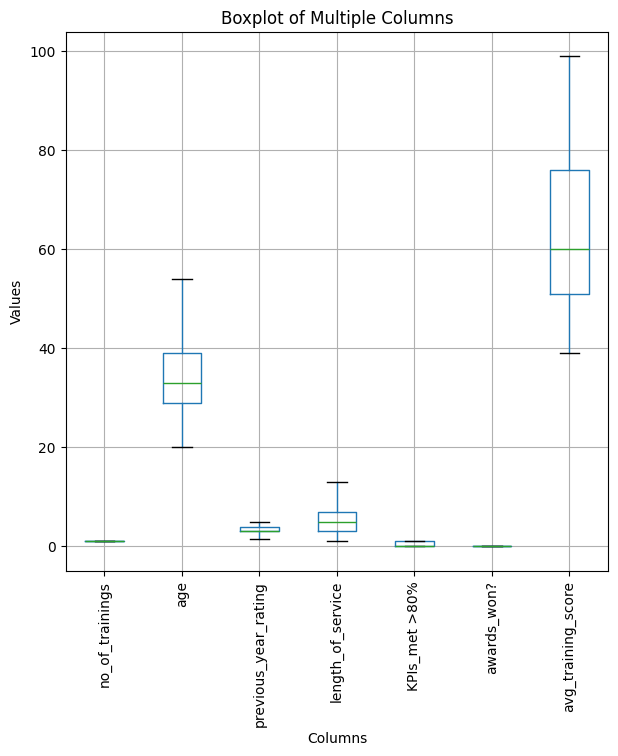

In [189]:
# Create boxplot to check outliers are present in the dataset after outlier treatment
#create boxplot
plt.figure(figsize=(7, 7))
test_data[cols_to_boxplot].boxplot()
plt.title('Boxplot of Multiple Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

**Encoding**

In [190]:
#dropping 'region' in test data
test_data.drop('region',axis=1,inplace=True)

In [191]:
#encoding education
test_data['education'] = test_data['education'].map( {'Below Secondary': 0, 'Bachelor\'s': 1, 'Master\'s & above': 2} ).astype(int)

In [192]:
#freeque encoding/count encoding
test_data['department']=test_data['department'].map(test_data['department'].value_counts())
test_data['recruitment_channel']=test_data['recruitment_channel'].map(test_data['recruitment_channel'].value_counts())

In [193]:
#label encoding in test data
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
le = LabelEncoder()
# Apply label encoding to the 'gender' column
test_data['gender'] = le.fit_transform(test_data['gender'])

In [194]:
#dropping 'region' in train data
train_data.drop('region',axis=1,inplace=True)

In [195]:
#label encoding in train data
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
le = LabelEncoder()
# Apply label encoding to the 'gender' column
train_data['gender'] = le.fit_transform(train_data['gender'])

In [196]:
#encoding education
train_data['education'] = train_data['education'].map( {'Below Secondary': 0, 'Bachelor\'s': 1, 'Master\'s & above': 2} ).astype(int)

In [197]:
#freeque encoding/count encoding
train_data['department']=train_data['department'].map(train_data['department'].value_counts())
train_data['recruitment_channel']=train_data['recruitment_channel'].map(train_data['recruitment_channel'].value_counts())

In [198]:
train_data.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,16840,2,0,23220,1.0,35.0,5.0,8.0,1,0.0,49,0
1,11348,1,1,30446,1.0,30.0,5.0,4.0,0,0.0,60,0
2,16840,1,1,23220,1.0,34.0,3.0,7.0,0,0.0,50,0
3,16840,1,1,30446,1.0,39.0,1.5,10.0,0,0.0,50,0
4,7138,1,1,30446,1.0,45.0,3.0,2.0,0,0.0,73,0


In [199]:
# Splitting the train data into dependent and independent variables
# Define target and features
y = train_data["is_promoted"]
X = train_data.drop("is_promoted", axis=1)

# Check class distribution
print(y.value_counts())

# Print shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


is_promoted
0    50140
1     4668
Name: count, dtype: int64
Shape of X: (54808, 11)
Shape of y: (54808,)


In [200]:
# splitting x and y into train and validation sets
#train test split for model building
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.30,random_state=0)
print("Shape of x_train: ", X_train.shape)
print("Shape of x_valid: ", X_valid.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_valid.shape)

Shape of x_train:  (38365, 11)
Shape of x_valid:  (16443, 11)
Shape of y_train:  (38365,)
Shape of y_valid:  (16443,)


In [201]:
'''# standard scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_valid = sc.transform(X_valid)'''

'# standard scaling\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nx_train = sc.fit_transform(X_train)\nx_valid = sc.transform(X_valid)'

**Modeling**

In [202]:
#importing necessery libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

Logistic Regression

In [203]:
#  Trying the LogisticRegression Classifier
log_reg = LogisticRegression(random_state=42,max_iter=50000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=50000, random_state=42)

K-Nearest Neighbors

In [204]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

Decision Tree Classifier

In [205]:
#  Trying the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [206]:
#  Trying the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Support Vector Machine

In [207]:
#  Trying the Support Vector Classifier
svc = SVC(kernel = 'rbf', random_state=42)
svc.fit(X_train, y_train)

SVC(random_state=42)

Naive Bayes

In [208]:
#Naivebayes
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

XGBoostClassifier

In [209]:
from xgboost import XGBClassifier
modelxg = XGBClassifier(random_state=42)
modelxg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

AdaboostClassifier

In [210]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

GradientBoostingClassifier

In [211]:
from sklearn.ensemble import GradientBoostingClassifier
modelog=GradientBoostingClassifier(learning_rate=0.01,n_estimators=5,random_state=42)
modelog.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=5, random_state=42)

In [212]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
for clf in (log_reg,knn,dt,rf,svc,classifier,modelxg,model,modelog):
    y_pred = clf.predict(X_valid)
    print(
        clf.__class__.__name__,
        '\n',
        'Accuracy score: ',accuracy_score(y_valid, y_pred), '\n',
        'Precision score: ',precision_score(y_valid, y_pred, zero_division = 1), '\n',
        'Recall score: ',recall_score(y_valid, y_pred, zero_division = 1), '\n',
        'F1 score: ',f1_score(y_valid, y_pred, zero_division = 1), '\n',

    )

LogisticRegression 
 Accuracy score:  0.9228851182874171 
 Precision score:  0.946969696969697 
 Recall score:  0.09018759018759019 
 F1 score:  0.16469038208168643 

KNeighborsClassifier 
 Accuracy score:  0.9371769141884084 
 Precision score:  0.8440545808966862 
 Recall score:  0.3124098124098124 
 F1 score:  0.45602948920484465 

DecisionTreeClassifier 
 Accuracy score:  0.8949705041659065 
 Precision score:  0.3893575600259572 
 Recall score:  0.4329004329004329 
 F1 score:  0.40997608472839087 

RandomForestClassifier 
 Accuracy score:  0.9305479535364592 
 Precision score:  0.6967741935483871 
 Recall score:  0.3116883116883117 
 F1 score:  0.4307078763708873 

SVC 
 Accuracy score:  0.9157088122605364 
 Precision score:  1.0 
 Recall score:  0.0 
 F1 score:  0.0 

GaussianNB 
 Accuracy score:  0.9009913032901539 
 Precision score:  0.2570281124497992 
 Recall score:  0.09235209235209235 
 F1 score:  0.13588110403397027 

XGBClassifier 
 Accuracy score:  0.9402177218269172 
 Pre

**We get higher accuracy with the XGBoost classifier(94%)**

**HYPERPARAMETER TUNING:**

Grid search:

In [213]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Initialize XGBClassifier
model_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Run grid search
grid_search = GridSearchCV(
    estimator=model_xgb,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Get best model
print("Best parameters found by GridSearchCV:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Predict on validation set
y_pred = best_model.predict(X_valid)

# Evaluate
print(classification_report(y_valid, y_pred))


Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:21:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found by GridSearchCV: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15057
           1       0.92      0.34      0.49      1386

    accuracy                           0.94     16443
   macro avg       0.93      0.67      0.73     16443
weighted avg       0.94      0.94      0.93     16443



Random Search:

In [214]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import numpy as np

# Define parameter distributions
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.8, 1.0],

}

# Initialize the model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the search on training data
random_search.fit(X_train, y_train)

# Get best model
print("Best parameters found by RandomizedSearchCV:", random_search.best_params_)
best_model = random_search.best_estimator_

# Predict on validation set
y_pred = best_model.predict(X_valid)

# Evaluate
print(classification_report(y_valid, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:24:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found by RandomizedSearchCV: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.1}
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15057
           1       0.92      0.34      0.50      1386

    accuracy                           0.94     16443
   macro avg       0.93      0.67      0.73     16443
weighted avg       0.94      0.94      0.93     16443



**We achieved 94% accuracy after hyperparameter tuning.**

**Predict on the Test Set**

In [218]:
test_predictions = best_model.predict(test_data)


**Final Submission File**

In [219]:
submission = pd.read_csv('/content/sample_submission_M0L0uXE.csv')
submission["is_promoted"] = test_predictions

# Save to CSV
submission.to_csv("xgb_submission.csv", index=False)
